### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

### Reading Dataset from CSV file

In [2]:
diabetes_dataset = pd.read_csv('./Datasets/Diabetes.csv') 

### Data Analysis

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
# Common Statistical Measures
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Possible Outcomes
# 0 = Non-Diabetic, 1 = Diabetic
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# Mean Values of All Outcomes
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Dividing Dataset into Featues and Target

In [8]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Creating and Fitting the Scaler

In [11]:
scaler = StandardScaler()

In [12]:
# Fitting Data to Standardizer
scaler.fit(X)

StandardScaler()

In [13]:
# Standardizing the Data
standardized_data = scaler.transform(X)

In [14]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [15]:
# Re-Dividing Dataset into Featues (X) and Target (Y)
X = standardized_data
Y = diabetes_dataset['Outcome']

In [16]:
print(X)
print()
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Splitting Data into Training & Testing Part

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, stratify=Y, random_state=0)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### Creating and Fitting the Scaler

In [19]:
# Creating SVM Classifier
classifier = svm.SVC(kernel='linear')

In [20]:
# Training the Model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [22]:
# Predictions on Training Data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8979802931596091


In [23]:
# Predictions on Testing Data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8892207792207792


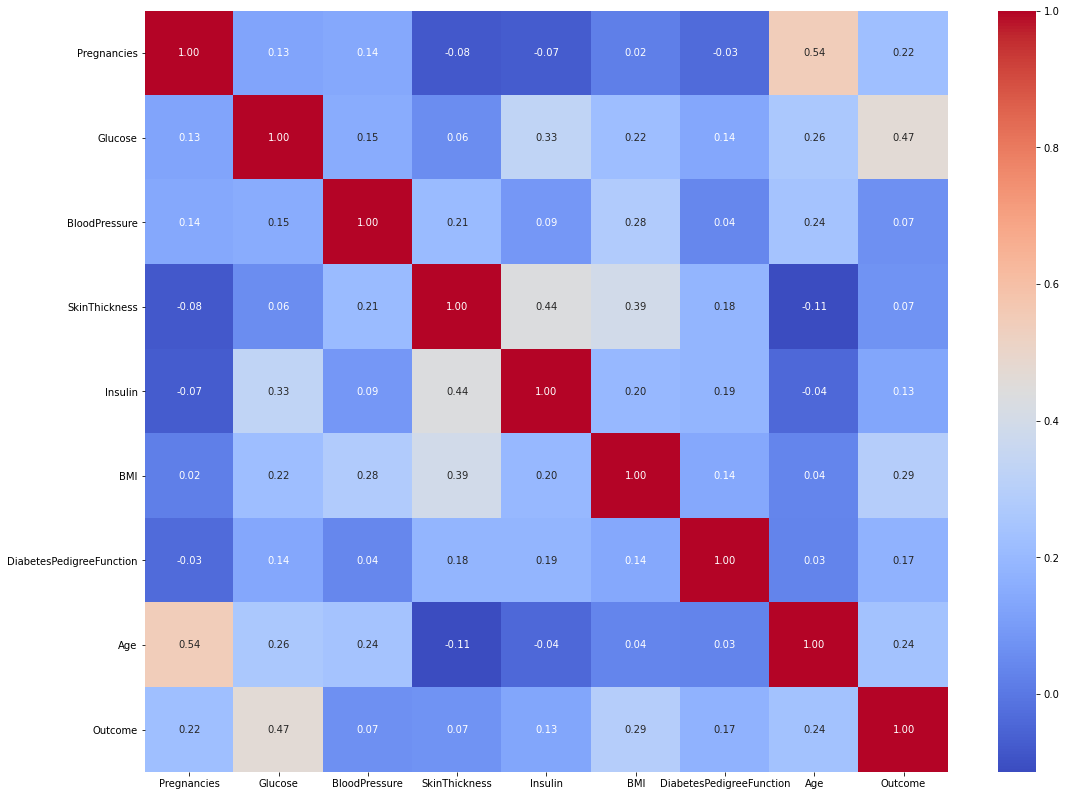

<AxesSubplot:>

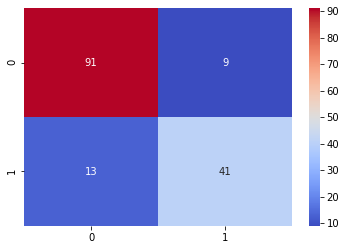

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import figure

plt.figure(figsize = (18,14))
sns.heatmap(diabetes_dataset.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm2 = confusion_matrix(Y_test, X_test_prediction)
# print(cm2)
sns.heatmap(cm2,annot=True,fmt="d",cmap="coolwarm")

### Saving Model

In [25]:
# Saving Model & Loading It to Check Usage

import pickle

file = open('./Models/Diabetes_model_pkl', 'wb')
pickle.dump(classifier, file)
file.close()
file = open('./Models/Diabetes_scaler_pkl', 'wb')
pickle.dump(scaler, file)
file.close()
file = open('./Models/Diabetes_model_pkl', 'rb')
model = pickle.load(file)
file.close()
file = open('./Models/Diabetes_scaler_pkl', 'rb')
scaler = pickle.load(file)
file.close()

input_data = (5,166,72,19,175,25.8,0.587,51)

np_array = np.asarray(input_data)
data_reshaped = np_array.reshape(1,-1)
std_data = scaler.transform(data_reshaped)

prediction = model.predict(std_data)

if (prediction[0] == 0):
    print("{} - Not Diabetic".format(prediction[0]))
else:
    print("{} - Diabetic".format(prediction[0]))

1 - Diabetic
